# ネットワーク解析のガイド (パート１- ネットワーク データセット とネットワーク解析)

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
    <li><span><a href="#イントロダクション" data-toc-modified-id="Introduction-1">イントロダクション</a></span></li>
    <li><span><a href="#ネットワークとは" data-toc-modified-id="What-is-a-network?-2">ネットワークとは</a></span>
        <ul class="toc-item">
        <li><span><a href="#ネットワーク-データセットとは" data-toc-modified-id="Network-Dataset-2.1">ネットワーク データセットとは</a></span></li>
        <li><span><a href="#マルチモーダル-ネットワーク-データセット" data-toc-modified-id="Multimodal-Network-Dataset-2.2">マルチモーダルネットワークデータセット</a></span></li>
        <li><span><a href="#3D-ネットワーク-データセット" data-toc-modified-id="3D-Network-Dataset-2.3">3D ネットワーク データセット</a></span></li>
        </ul>
    </li>
    <li><span><a href="#ネットワーク解析サービス" data-toc-modified-id="Network-Analysis-Services-3">ネットワーク解析サービス</a></span></li><li><span><a href="#次のトピックについて" data-toc-modified-id="What's-next?-4">次のトピックについて</a></span></li>
    <li><span><a href="#総括" data-toc-modified-id="Conclusions-5">総括</a></span></li>
    <li><span><a href="#参考情報" data-toc-modified-id="References-6">参考情報</a></span></li></ul></div>


## イントロダクション

ArcGIS API for Python の `Network Analysis` は、次のような質問に答えるために設計されています。<a href="#参考情報">[1]</a>

 - マンハッタンからブルックリンへの最速の移動手段は？
 - サンフランシスコのダウンタウンで火災が発生した場合、車で5分以内に対応できる最寄りの消防署は？
 - 各都市の倉庫がカバーしている市場面積は？
 - 現在の場所から一番近いコーヒーショップはどこですか？
 - 輸送コストを最小限に抑え、顧客サービスを向上させるためには、どのように配送車両のルートを決定すればよいでしょうか？
 - 市場シェアを最大化するためには、どこに新しい支店を開設すればよいのでしょうか？
 - 当社は縮小する必要があります - 全体的な需要を維持するためには、どの店舗を閉鎖すべきですか？
 - ライブまたは過去の交通状況はどのようなもので、ネットワーク分析の結果にどのように影響しますか？


これらの質問は、企業、公共サービス、または組織が業務をより効率的に遂行し、戦略的意思決定を改善することに関連しています。
例えば、組織は自社の商品やサービスにアクセスできる人が分かれば、現在の市場と潜在的な市場の両方をより理解することができます。
時間帯、車両容量、最大移動時間などのいくつかの制約を考慮しながら、停留所を最適に配列し、停留所間の最短経路を見つけることで、輸送コストを削減することができます。
顧客サービスは、より迅速な対応、またはより利便性の高い施設の立地を通じて改善することができます。

以下の図は、ネットワーク解析を利用する一般的なアプリケーションについてまとめたものです。

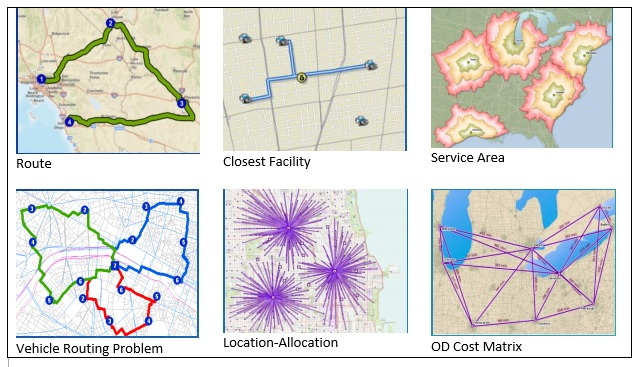
<text align="left">図 1. ネットワーク解析の一般的なアプリケーション(出典:<!--Fig 1. Common applications of Network Analysis (source:--> <a href="#References">[2]</a>)</text>

・Route（ルート検索）

・Closest Facility（最寄りの検索）

・Service Area（到達圏）

・Vehicle Routing Problem（配車ルート解析）

・Location-Allocation（ロケーション・アロケーション）

・OD Cost Matrix（OD コストマトリックス）

このガイドでは、一般的に使用されるネットワーク解析ツールと、上記のような課題や疑問点を ArcGIS API for Python でどのように解決できるかを、次の順番で記載しています。

 - Network Dataset and Network Analysis (<a href="part1_introduction_to_network_analysis.ipynb">You are here!</a>) / ネットワーク データセットとネットワーク解析 (この翻訳版)
 - Find Routes (<a href="part2_find_routes.ipynb">Part 2</a>) / ルート検索 (<a href="part2_find_routes_ja.ipynb">パート 2</a>)
 - Generate Service Area (<a href="part3_generate_service_area.ipynb">Part 3</a>) / 到達圏の作成 (パート 3)
 - Find Closest Facility (<a href="part4_find_closest_facilities.ipynb">Part 4</a>) / 最寄りの検索
 - Generate Origin Destination Cost Matrix (<a href="part5_generate_od_cost_matrix.ipynb">Part 5</a>) / OD コストマトリックス
 - Solve Location Allocation (<a href="part6_solve_location_allocation.ipynb">Part 6</a>) / ロケーション・アロケーション
 - Vehicle Routing Problem Service (<a href="part7_vehicle_routing_problem.ipynb">Part 7</a>) / 配車ルート解析
 

次のトピックにジャンプしたい場合は、上記のロードマップを直接参照してください。そうでない場合、パート1では、ネットワーク データセット、およびネットワーク解析の問題を解決するために必要な、前提条件を得ることになります。


残りのガイドでは、<a href="part2_find_routes.ipynb">Part 2</a>（<a href="part2_find_routes_ja.ipynb">翻訳版</a>）では、選択したインピーダンスに応じて、最速、最短、あるいは最も景色の良いルートを見つける方法を紹介します。
<a href="part3_generate_service_area.ipynb">Part 3</a> （翻訳版） では、ネットワーク上でアクセス可能な道路（特定のインピーダンス内にある道路）を網羅した、到達圏を見つける方法を紹介します。 
<a href="part4_find_closest_facilities.ipynb">Part 4</a> では、インシデントと施設の間の移動コストを測定して、お互いに最も近いものを判断するための手順を説明します。
<a href="part5_generate_od_cost_matrix.ipynb">Part 5</a> では、複数の起点から複数の目的地までのネットワークに沿った最小コストの経路を見つけ手測定する方法について説明します。
<a href="part6_solve_location_allocation.ipynb">Part 6</a> では、施設のための最適化された新しい場所の割り当てを決定するプロセスを示しています。
<a href="part7_vehicle_routing_problem.ipynb">Part 7</a>では、訪問先に最善のサービスを提供しながら、保有車両の全体の運用コストを最小にする、配車ルート解析のような、より高度なトピックをカバーしています。



<!--
If you are new to Network Analysis or in need of a refresher of the concepts, the Youtube video below would serve as a good introduction to the key ideas:
-->
ネットワーク解析に慣れていない場合、もしくは概念について再教育を必要としている場合は、以下のYoutubeビデオ（英語）は、導入として役立つでしょう。

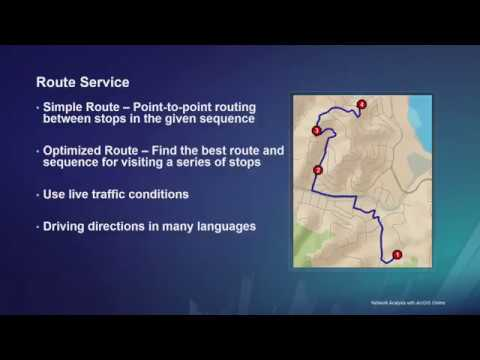

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('cakVXmuB0ag')

## ネットワークとは

ネットワークとは、エッジ（ライン）や接続ジャンクション（ポイント）のような要素が相互に接続されたシステムで、ある地点から、別の地点への可能なルートを表します。<a href="#参考情報">[1]</a>


自動車やトラックは道路を、航空会社は決められた飛行経路を、石油はパイプラインを流れています。潜在的な移動経路をネットワークでモデル化することで、ネットワーク上の石油、トラック、または他のエージェントの移動に関連した分析を行うことができます。最も一般的なネットワーク解析は、2点間の最短経路を見つけることです。

ArcGIS ではネットワークを、ユーティリティ ネットワークとネットワーク データセットの2つのカテゴリに分類しています。ユーティリティ ネットワークについて詳しく知りたい場合は、<a href="https://pro.arcgis.com/ja/pro-app/help/data/utility-network/what-is-a-utility-network-.htm">こちら</a> を参照いただくこととし、このガイドでは2つ目のカテゴリのみを取り上げます。

### ネットワーク データセットとは

ネットワーク データセットは、道路ネットワークをモデリングするのに適しています。ネットワーク データセットは、シンプル フィーチャ (ラインとポイント) およびターンを含めることができるソース フィーチャから作成され、ソース フィーチャの接続性を格納します。ネットワーク解析を実行するときには、常にネットワーク データセット上で実行されます。


ネットワーク データセットは、ネットワーク エレメントから構成されています。ネットワーク エレメントは、ネットワーク データセットの作成に使用されるソース フィーチャから生成され、接続性の確立には、ソース フィーチャのジオメトリを使用できます。また、ネットワーク エレメントには、ネットワーク上のナビゲーションを制御する属性があります <a href="#参考情報">[4]</a>。

ネットワーク エレメントには、次の 3 種類があります：


 - **エッジ** — 別のエレメント (ジャンクション) に接続するエレメントで、エージェントが移動リンクになります。
 - **ジャンクション** — エッジと接続し、1 つのエッジから別のエッジへのナビゲーションを行います。
 - **ターン** — 複数のエッジの間の移動に影響する可能性のある情報を格納します。

ネットワークの基本構造はエッジとジャンクションから構成され、ネットワークの接続性はエッジとジャンクションを相互に接続することで確立されます。ターンはオプションのエレメントで、たとえば、ある特定のエッジから別のエッジへの左折を規制する場合など、特定のターン移動に関する情報を格納します。

### マルチモーダル ネットワーク データセット

マルチモーダル ネットワーク データセットは、起点と目的地のセットが同じままで、2つ以上の異なる輸送モードで実行される場合の輸送状況に使用されます。例えば、パリ市内の交通網を、道路、鉄道、バスで構築すると、マルチモーダル ネットワークのデータセットが得られます。<a href="#References">[3]</a>。

### 3D ネットワーク データセット

3 次元ネットワークデータセットを使用すると、建物や鉱山、洞窟などの内部の通路をモデル化することができます。正確なZ座標値を持つ道路フィーチャがあれば、建物内部の経路をモデル化し、キャンパスや都市の3次元ネットワークのZ値とあわせて使用することができます。
これにより、次のような質問に答えることができます。(1) 異なる建物の部屋の間を車椅子で移動するのに最適なルートは何か？(2) 高層ビルの何階が、8分以内に消防が来ないのか？<a href="#参考情報">[1]</a>


## ネットワーク解析サービス

ネットワーク解析 (NA) サービスは、ArcGIS Network Analysis ソルバ によって呼び出されるようになっています (ルート検索、最寄りの検索、到達圏、ロケーション・アロケーション、ODコストマトリックス、配車ルート解析など)<a href="#References">[1]</a>。

ユーザーは、ArcGIS Online でホストされすぐに利用可能なネットワーク解析（NA）サービス、またはユーザーが事前に公開して設定したArcGIS Enterprise 上のカスタマイズされたネットワーク解析（NA）サービスのいずれかを選択することができます。

ArcGIS Online を使用して解析を実行する場合、ソルバ は ArcGIS Online 上に保存されている高品質な世界的な規模のネットワーク データセットを参照し、ArcGIS Online のクレジットを消費します。独自のデータを使用している場合は、Online のクレジットは消費しませんが、ネットワーク データセットをプロジェクトに関連付ける必要があります。

ArcGIS Online ネットワーク解析サービスを使用すると、ネットワーク データセットの作成や購入、ArcGIS Network Analyst エクステンションのライセンス購入をすることなく、過去、ライブ、および予測される交通状況を表示することもできます（ArcGIS Onlineでのライブ、および予想される交通状況のデータは日本地域は未対応です）。これらのサービスは、定期的に更新される高品質の道路データを参照しています。

これらのサービスにアクセスするには、ネットワーク解析の権限を持つ ArcGIS Online の組織向けアカウントが必要であり、アプリケーションが ArcGIS Online に接続している必要があります。また、ArcGIS Online アカウントを使用して ArcGIS Pro のライセンスを取得している場合は、すでにアプリケーションにサインインしている可能性があります。
サービス利用時の消費クレジットについては、次をご参照ください。


表 - ネットワーク解析サービス利用時の消費クレジット。
詳細は弊社ホームページの 
[機能別のクレジット](https://www.esrij.com/products/arcgis-online/credits/) をご参照ください。

| 機能 | 機能（英語） | 消費クレジット |
|:-----------|:------------|:------------|
| 到達圏 | Service Areas | 1 到達圏につき 0.5 クレジット |
| 最寄りの検索 | Closest Facility Routes | 1 ルートにつき 0.5 クレジット |
| 配車ルート解析 | Multi-Vehicle Routes | 1 ルートにつき 1 クレジット |
| ジオエンリッチメント | GeoEnrichment | 1 変数につき 0.01 クレジット |
| 単純ルート検索 | Simple Routes | 1 ルートにつき 0.005 クレジット |
| ロケーション・アロケーション | Location-Allocation | 1 需要地点ルートにつき 0.1 クレジット |
| OD コストマトリックス | Origin Destination Cost Matrix | 1 起点終点ペアにつき 0.0005 クレジット |



ArcGIS Online 上のすぐに利用可能なネットワーク解析（NA）サービスは、ユーザーに利便性を提供してきました。一方で、カスタマイズしたネットワーク解析（NA）サービスを使用したい場合もあるかと思います。
例えば、ユーザーが所属する ArcGIS Online の組織サイトのクレジットが不足している場合や、ユーザーがネットワーク解析（NA）の解法プロセス全体を非公開にして他のユーザと共有できないようにしたい場合、ソルバ が消費する CPU リソースやメモリ リソースが ArcGIS Online の制限を超えてしまうという計算リソースの観点から、ユーザーはArcGIS Enterprise 上のカスタマイズされたネットワーク解析（NA）サービスを使用するという代替手段を検討する必要があるかもしれません。


## 次のトピックについて


ルート検索、到達圏の作成、最寄りの施設の検索などの要件を満たすために複数のソルバ メソッドが利用可能で、同じ操作に対してユーザーはそれぞれ `arcgis.network.analysis` と `arcgis.features.use_proximity` モジュールで定義されている 2 つの API メソッドの間で選択することができます。この実装は、 次の <a href="guide_to_network_analysis_part2.ipynb">Part 2</a>, <a href="guide_to_network_analysis_part3.ipynb">Part 3</a>,  <a href="guide_to_network_analysis_part4.ipynb">Part 4</a> でカバーしています。


| 解析の種類        |  network.analysis  | features.use_proximity |
|:------------------|:---------------------------------------------|:------------------------|
| Route （ルート検索）           |  find_routes            | plan_routes            |
| Service Area （到達圏）    |  generate_service_areas | create_drive_time_areas|
| Closest Facility （最寄りの検索）| find_closest_facilities | find_nearest |


例えば、ルート検索では、上の表に示すように、`network.analysis.find_routes` と `features.use_proximity.plan_routes` から選択することができます。この2つのモジュールのAPIの違いは、以下の通りです。

 - `network.analysis` メソッドは比較的高速で、サーバーのリソースや時間が必要な大規模な問題を解決するのに役立ちます。
 - `network.analysis` ツールは、よりシンプルな方法で問題を解決することを目的とした粗粒のオンライン・ウィジェットと考えることができます。
 - `network.analysis` にはネットワーク解析のプロセスに必要な、すべての機能が含まれていますが、 `features.use_proximity` にはサブセットのみが含まれています。
 - `feature.use_proximity`はワークフロー駆動型であり、Web GIS 指向（ユーザーが Feature Serviceを入力し、Feature Serviceとして出力を得ることができる）であるのに対し、`network.analysis`ツールは入力パラメータを取り、出力変数をインメモリの`FeatureCollection`として返します。
 - 出力される `Feature Collection` のサイズが大きい場合、ArcGIS API for Python では、出力をサーバ側で処理して Feature Service として保存できるように `features.use_proximity` ワークフローを実装することを推奨しています（出力としての `FeatureSet` の処理や作成には、より多くのメモリと計算時間が必要となるため）。


## 総括

パート 1 では、ネットワーク解析で問題を解決するために必要なネットワーク データセット、ネットワーク解析、ArcGIS API for Python で提供されているモジュールを紹介してきました。次に、選択したインピーダンスに応じて、最速、最短、あるいは最も景色の良いルートを見つける方法を実演する<a href="part2_find_routes.ipynb">Part 2</a>（<a href="part2_find_routes_ja.ipynb">パート2</a>）に進んでみましょう。

## 参考情報

[1] "ArcGIS Network Analyst エクステンションとは", https://pro.arcgis.com/ja/pro-app/help/analysis/networks/what-is-network-analyst-.htm, 2020年 6月にアクセス

[2] Deelesh Mandloi, "Network Analysis Services in ArcGIS Enterprise", http://proceedings.esri.com/library/userconf/proc17/tech-workshops/tw_419-218.pdf, 2020年 6月25日に最終アクセス

[3] "ネットワーク データセットとは", https://pro.arcgis.com/ja/pro-app/help/analysis/networks/what-is-network-dataset-.htm, 2020年 6月にアクセス

[4] "ネットワーク エレメント", https://pro.arcgis.com/ja/pro-app/help/analysis/networks/network-elements.htm, 2020年 6月にアクセス

[5] "ネットワーク解析レイヤー", https://pro.arcgis.com/ja/pro-app/help/analysis/networks/new-network-analysis-layer.htm, 2020年 6月にアクセス